In [78]:
import PIL
import glob
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [79]:
base_dir = "../data/severstal-steel-defect-detection/"
csv_path = os.path.join(base_dir, "train.csv")

df = pd.read_csv(csv_path)

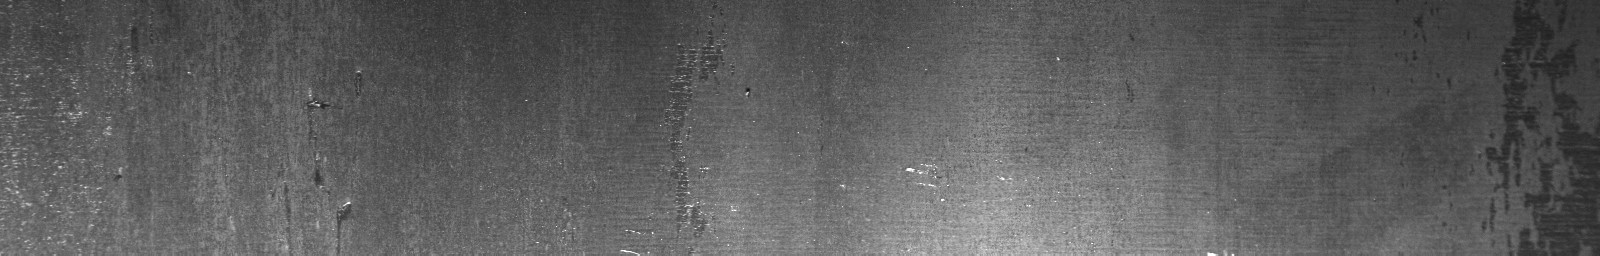

In [80]:
PIL.Image.open(os.path.join(base_dir,"train_images", df["ImageId"][0]))

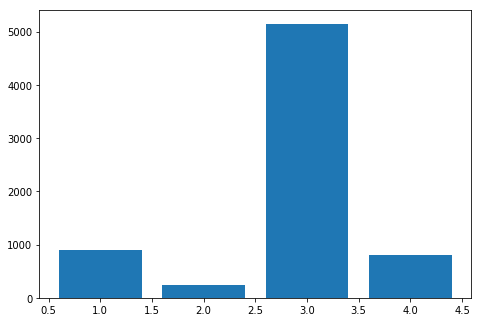

In [81]:
nunique = df["ClassId"].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(nunique.index, nunique)
plt.show()

In [82]:
# df["EncodedPixels"] = df["EncodedPixels"].apply(lambda x: list(map(int, x.split(' '))))

In [83]:
train_images = glob.glob(os.path.join(base_dir, "train_images/*"))
test_images = glob.glob(os.path.join(base_dir, "test_images/*"))

In [84]:
total_train = len(train_images)
total_test = len(test_images)

In [85]:
total_defects = len(df['ImageId'])
no_defects = total_train - total_defects

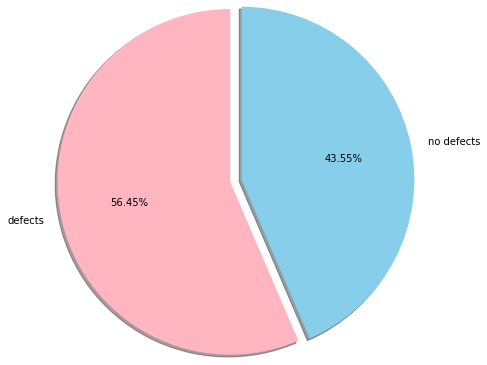

In [86]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie([total_defects, no_defects], (0.1, 0), ["defects", "no defects"], colors=['lightpink', 'skyblue'], autopct='%1.2f%%', shadow=True, startangle=90, radius=1.5)
plt.show()

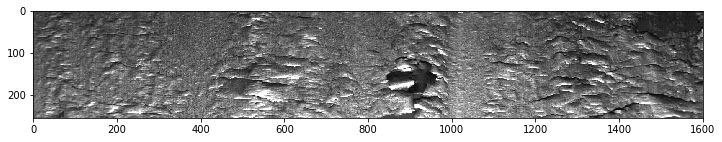

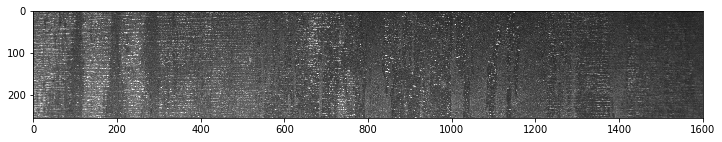

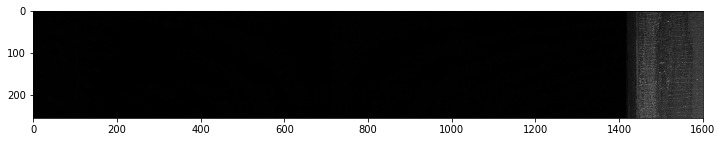

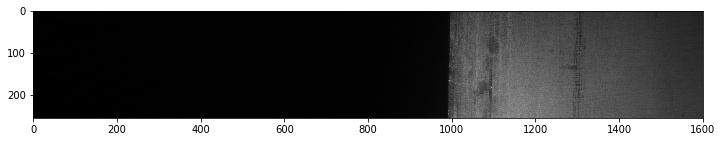

In [87]:
for i, image in enumerate(train_images[:10]):
    basename = os.path.basename(image)
    if basename not in df["ImageId"].values:
        plt.figure(i+1, figsize=(12, 18))
        plt.imshow(np.array(PIL.Image.open(image)))

In [88]:
class_counts = df["ClassId"].value_counts()

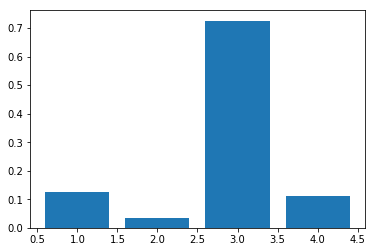

In [89]:
plt.bar(class_counts.index, (class_counts.values / total_defects))
plt.show()

In [90]:
labels_per_image = df.groupby('ImageId')['ClassId'].count().reset_index(name='count')
labels_per_image[labels_per_image["count"] > 2]

,ImageId,count
5740,db4867ee8.jpg,3
6253,ef24da2ba.jpg,3


In [91]:
images= []
class_id= []
for img in os.listdir(os.path.join(base_dir, "train_images")):
    images.append(img)
    class_id.append(1)
    images.append(img)
    class_id.append(2)
    images.append(img)
    class_id.append(3)
    images.append(img)
    class_id.append(4)
train_images= pd.DataFrame(images,columns=['ImageId'])
train_images['ClassId'] = class_id
print('train_images shape:', train_images.shape)
train_images.head()

train_images shape: (50272, 2)


,ImageId,ClassId
0,58ee62fd7.jpg,1
1,58ee62fd7.jpg,2
2,58ee62fd7.jpg,3
3,58ee62fd7.jpg,4
4,eeffa4c49.jpg,1


In [92]:
all_df = pd.merge(train_images, df, how='outer', on=['ImageId','ClassId'])
all_df = all_df.fillna('')
all_df[50:55]

,ImageId,ClassId,EncodedPixels
50,e5dfaf632.jpg,3,94587 7 94831 19 95075 31 95319 43 95563 55 95...
51,e5dfaf632.jpg,4,
52,194f48184.jpg,1,
53,194f48184.jpg,2,
54,194f48184.jpg,3,


In [93]:
all_df = pd.pivot_table(all_df, values='EncodedPixels', index='ImageId',columns='ClassId', aggfunc=np.sum).astype(str)
all_df = all_df.reset_index()
all_df.columns = ['ImageId','Defect_1','Defect_2','Defect_3','Defect_4']

In [94]:
all_df.to_csv(os.path.join(base_dir, "prep_data.csv"), index=False)